<a href="https://colab.research.google.com/github/gouri1125/ict_project/blob/main/UNSUPERVISED_ADULT_CASESTUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [2]:
filepath='/content/adult_dataset.csv'
df_adult=pd.read_csv(filepath)

In [3]:
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
df_adult.shape

(48842, 15)

In [5]:
df_adult.size

732630

In [6]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [7]:
df_adult.duplicated().sum()

np.int64(16)

In [8]:
df_adult.drop_duplicates(inplace=True)


In [9]:
df_adult =df_adult.drop(columns=['income'])  #for unsupervised learning the target not defined ,so here the income drop

In [10]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48826 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46384 non-null  float64
 1   workclass       45464 non-null  object 
 2   fnlwgt          48826 non-null  int64  
 3   education       48826 non-null  object 
 4   education-num   48826 non-null  int64  
 5   marital-status  48826 non-null  object 
 6   occupation      45469 non-null  object 
 7   relationship    48826 non-null  object 
 8   race            48826 non-null  object 
 9   sex             48826 non-null  object 
 10  capital-gain    48826 non-null  int64  
 11  capital-loss    48826 non-null  int64  
 12  hours-per-week  46384 non-null  float64
 13  native-country  46121 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 5.6+ MB


In [11]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46384.000000,4.882600e+04,48826.000000,48826.000000,48826.000000,46384.000000
mean,38.681528,1.896605e+05,10.078278,1079.421230,87.530988,40.451039
std,13.951072,1.056025e+05,2.570759,7453.214369,403.067466,12.645956
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376170e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [12]:
df_adult.isnull().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [13]:
#Replace NULL values (Numerical columns)
df_adult['age'].fillna(df_adult['age'].mean(), inplace=True)


/tmp/ipython-input-786824420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adult['age'].fillna(df_adult['age'].mean(), inplace=True)


In [14]:
cat_cols = df_adult.select_dtypes(include='object').columns

for col in cat_cols:
    df_adult[col].fillna(df_adult[col].mode()[0], inplace=True)


/tmp/ipython-input-3803279411.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adult[col].fillna(df_adult[col].mode()[0], inplace=True)


In [15]:
df_adult['hours-per-week'].fillna(df_adult['hours-per-week'].mean(), inplace=True)

/tmp/ipython-input-4088810872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adult['hours-per-week'].fillna(df_adult['hours-per-week'].mean(), inplace=True)


In [16]:
df_adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [17]:
df_adult.nunique()

,0
age,83
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


## OUTLIER HANDLING

<Axes: >

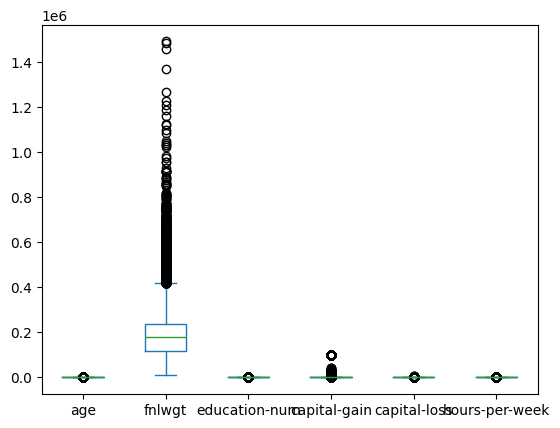

In [18]:
#outlier detection is for numerical values
df_adult.plot(kind='box')

In [19]:
num_cols = df_adult.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    Q1 = df_adult[col].quantile(0.25)
    Q3 = df_adult[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_adult[col] = df_adult[col].clip(lower, upper)

<Axes: >

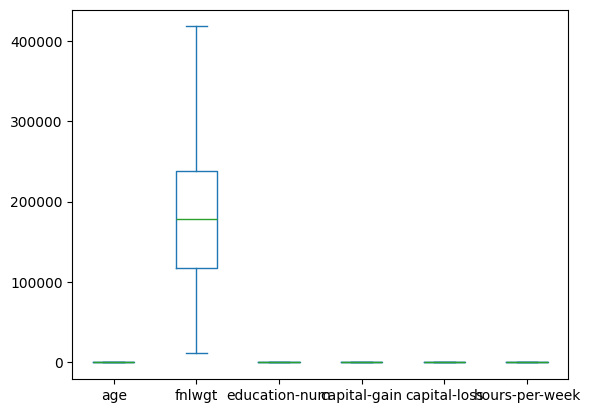

In [20]:
df_adult.plot(kind='box')

### **ENCODING**

In [21]:
#ONHOT-ENCODING
df_adult_encoded = pd.get_dummies(df_adult, drop_first=True,dtype=int)


In [22]:
df_adult_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516,13.0,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311,13.0,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721,7.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409,13.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **SCALING**

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [24]:
X = df_adult_encoded.select_dtypes(include=['int64', 'float64'])


In [25]:
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline on the full dataset
pipe.fit(X)

# Predict cluster labels
labels = pipe.predict(X)

print(labels)


[1 2 1 ... 1 1 1]


FEATURE DISTRIBUTION

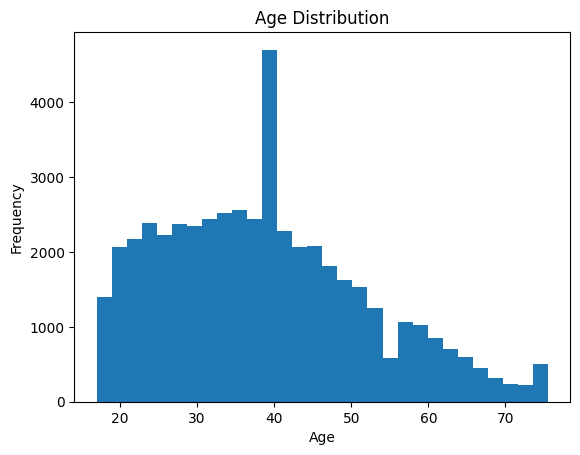

In [26]:
plt.figure()
plt.hist(X['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


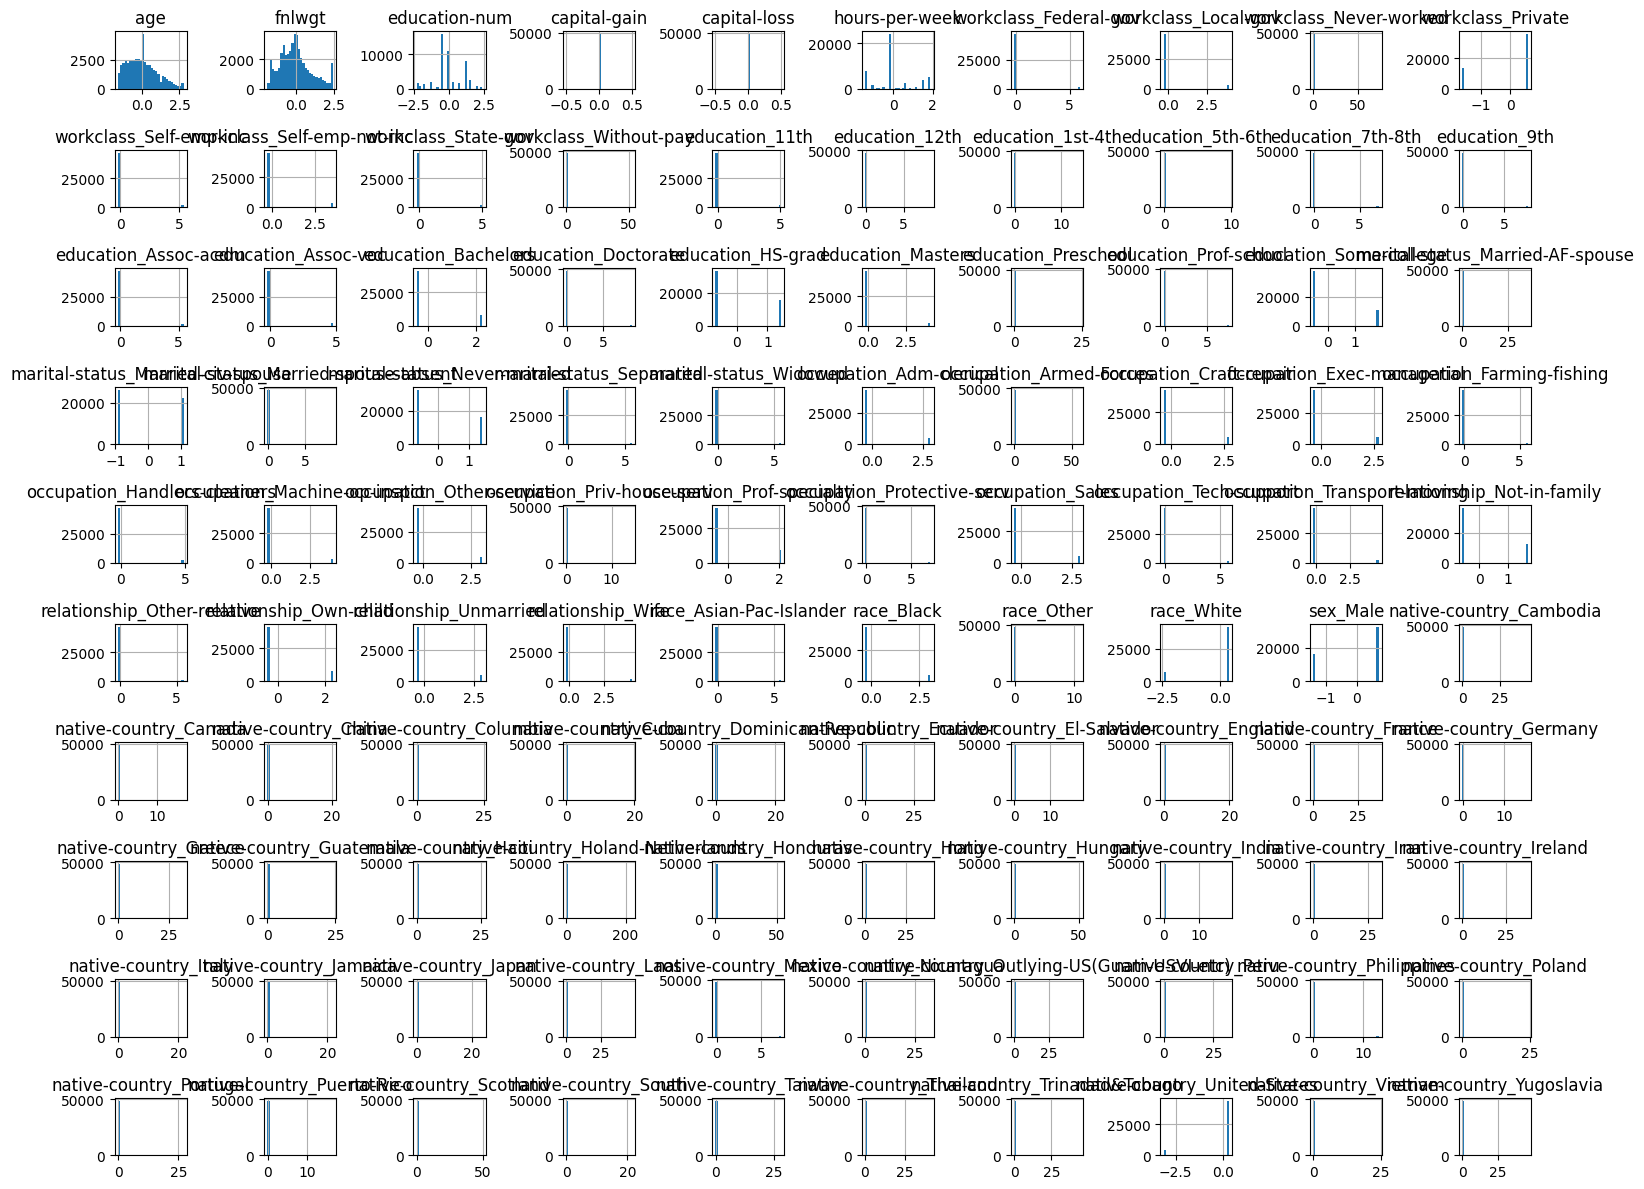

In [27]:

from sklearn.cluster import KMeans

# Select numeric columns
X = df_adult_encoded.select_dtypes(include=['int64', 'float64'])

pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit pipeline
pipe.fit(X)

# Predict cluster labels
labels = pipe.predict(X)

# Step 1: Impute + Scale (use pipeline steps)
X_scaled = pipe.named_steps['scaler'].transform(
    pipe.named_steps['imputer'].transform(X)
)

# Step 2: Convert to DataFrame for plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 3: Plot histogram
X_scaled_df.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()


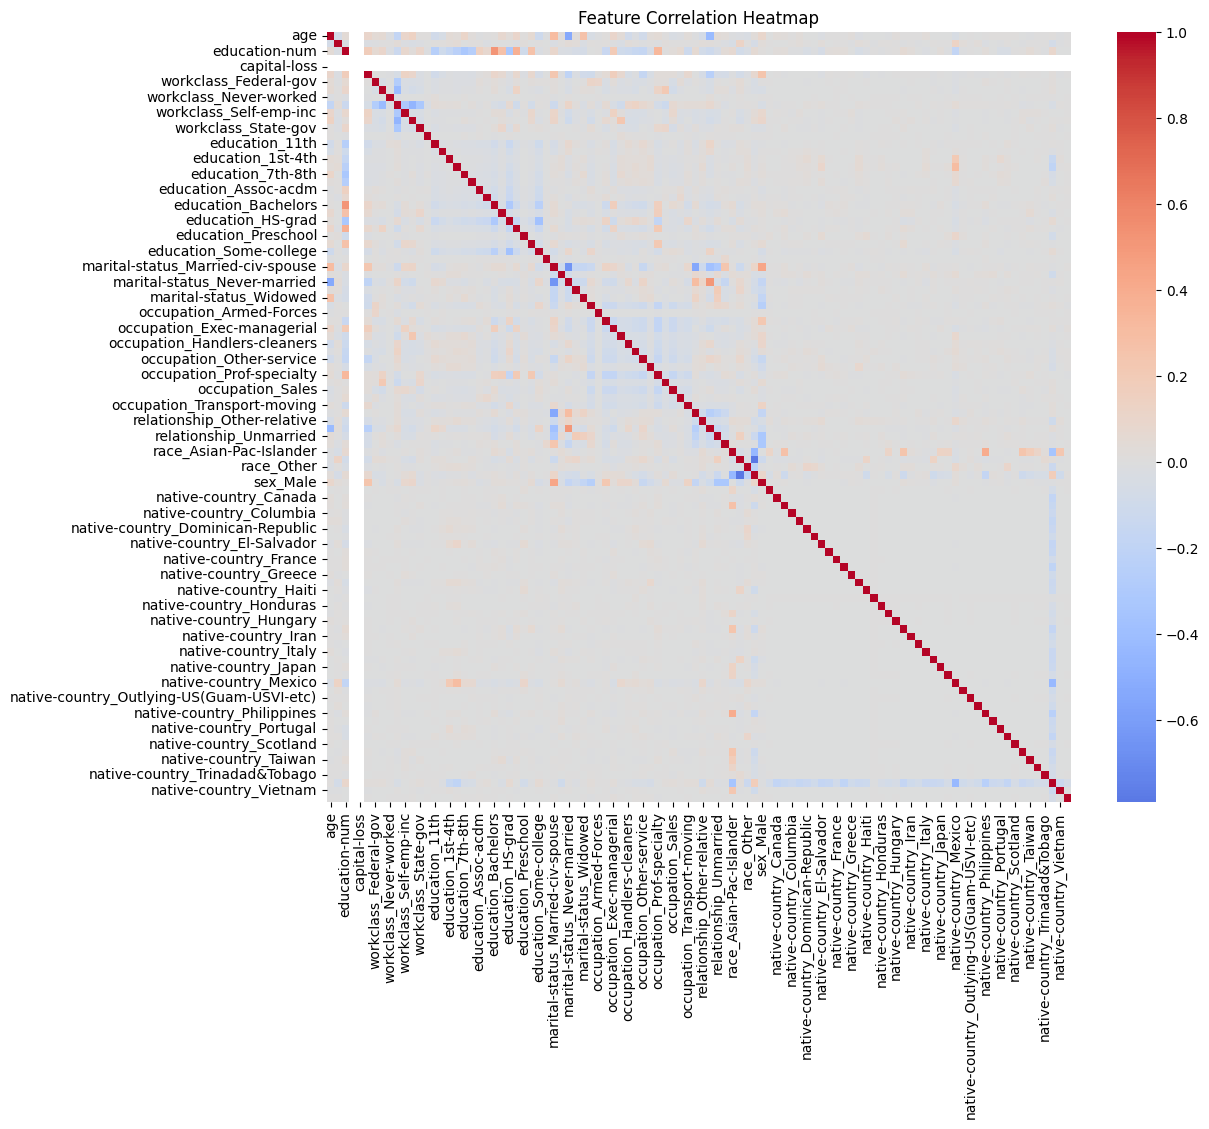

In [ ]:

import seaborn as sns

# Correlation matrix
corr = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


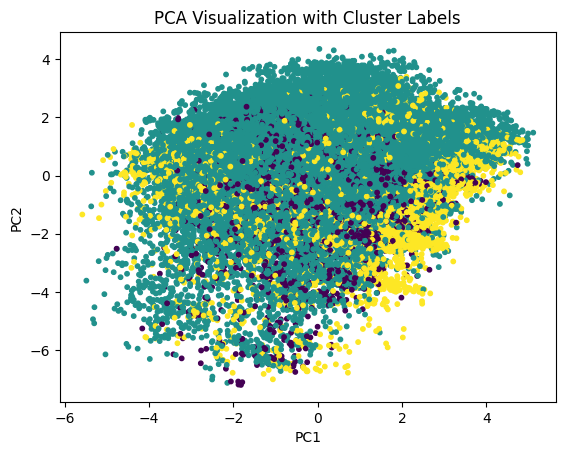

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale full dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot PCA with cluster labels
plt.figure()
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=labels,   # use KMeans labels
    s=10
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization with Cluster Labels')
plt.show()


## **CLUSTERING**

In [29]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

wcss


[4656570.95217859,
 4570787.144910568,
 4506671.520690294,
 4452709.787003403,
 4402792.496199872,
 4359957.418164258,
 4285172.07675666,
 4241617.336995502,
 4184866.1670506243]

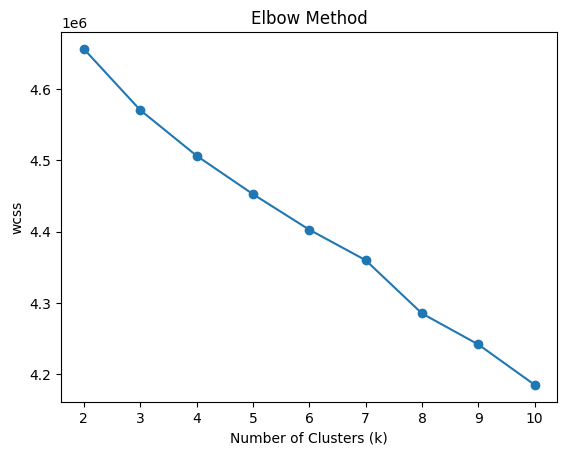

In [30]:
#'Elbow Method'
plt.figure()

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

In [31]:
wcss = []
sil = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10, random_state=0)
  #number of times the centroid setting n_init=10
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
  labels = kmeans.predict(X_scaled)
  sil_score = silhouette_score(X_scaled,labels)
  print("wccs and silhouette_score for k = {} is {} and{}".format(i,kmeans.inertia_,sil_score))
  sil.append(sil_score)

  wcss

wccs and silhouette_score for k = 2 is 4656570.95217859 and0.048993743817496334
wccs and silhouette_score for k = 3 is 4570787.144910568 and0.027794108138230213
wccs and silhouette_score for k = 4 is 4506671.520690294 and0.03535920028257384
wccs and silhouette_score for k = 5 is 4452709.787003403 and0.03731474537138694
wccs and silhouette_score for k = 6 is 4402792.496199872 and0.05140158011075384
wccs and silhouette_score for k = 7 is 4359957.418164258 and0.03285058214199222
wccs and silhouette_score for k = 8 is 4285172.07675666 and0.05378491486613743
wccs and silhouette_score for k = 9 is 4241617.336995502 and0.032928278443882145
wccs and silhouette_score for k = 10 is 4184866.1670506243 and0.03235061414957028


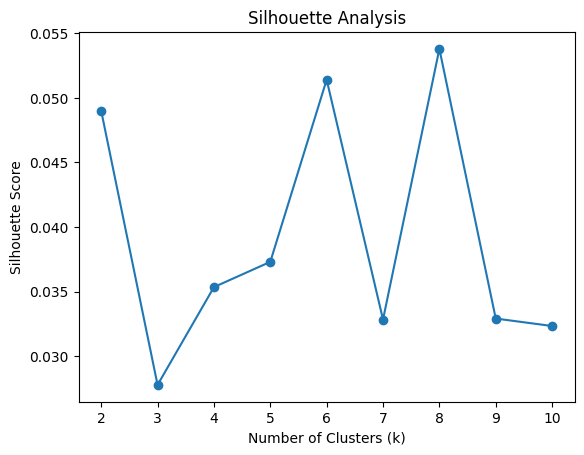

In [ ]:
#Silhouette Analysis
plt.figure()
plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.title('Silhouette Analysis')
plt.show()

**KMeans clustering**

In [ ]:
kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
df_adult_encoded['kmeans_clusters'] = kmeans_labels
df_adult_encoded


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,kmeans_clusters
0,39.0,77516,13.0,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
1,50.0,83311,13.0,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
2,38.0,215646,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,5
3,53.0,234721,7.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28.0,338409,13.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419,13.0,0,0,36.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,7
48838,64.0,321403,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
48839,38.0,374983,13.0,0,0,50.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,7
48840,44.0,83891,13.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [33]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [34]:
X_scaled_df['kmeans_clusters'] = labels

In [35]:
X_scaled_df['kmeans_clusters'].value_counts()


,count
kmeans_clusters,
9,12884
5,10473
7,7779
8,5908
0,5495
2,2631
4,1974
6,1598
3,83


**AGGLOMERATIVE CLUSTERING**

In [32]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

x = np.array(X_scaled)

In [ ]:
mergings = linkage(x, method='ward')
dendrogram(mergings, leaf_rotation=90)
plt.title('AgglomerativeClustering')
plt.xlabel('data points')
plt.ylabel('Euclidian distance')
plt.show()

In [ ]:
#for taking the longest distance ,also find the silot score
for i in range(2,11):
  hc = AgglomerativeClustering(n_clusters=i,linkage='ward')
  hc_labels = hc.fit_predict(X_scaled)
  sil_score = silhouette_score(X_scaled,hc_labels)
  print("silhouette_score for k = {} is {}".format(i,sil_score))
  #the below output k=5 has the maximum 58  so,next time i=5

In [ ]:
hc = AgglomerativeClustering(n_clusters=5,linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
df_adult_encoded['hc_clusters'] = hc_labels
df_adult_encoded

In [ ]:
comparison_df = pd.crosstab(df_adult_encoded['Species'], df_adult_encoded['hc_clusters'])
display(comparison_df)

In [ ]:
sns.scatterplot(x='Weight',y='Height',hue='hc_clusters',data=df_adult_encoded,palette='viridis')
plt.title('hc_clusters')
plt.xlabel('Weight')
plt.ylabel('Height')